# Homework 1
Eric Gagliano (egagli)

In this homework assignment we will work start with programming and data visualization to better qualitatively understand the types of datasets that we'll be using the rest of the quarter. Please download the notebooks at the top of this page and use them as reference for your coding. Be sure to save your work for later reference, as you will see these datasets again!

# Exploring Non-Stationary Flood Statistics

Download the files containing observed instantaneous peak flow data for the Sauk River and Skykomish River in western Washington. If you are interested in other rivers, e.g., for your project, these data can be obtained from the USGS.

Note that annual peak flows are reported by water year (Oct 1 of the previous calendar year to September 30), so some calendar years appear to have two values. Water years are shown in an additional column in the excel files. For the purposes of this assignment, we will only consider peak flows by water year, and the years requested below refer to water years. (For example, the first flood reported in the Skykomish occurred on Oct 10, 1928 – this is the flood of water year 1929.)

## A. Plot the data from the Sauk River and Skykomish River as a time series from 1929-2020. Use different color lines or symbols to distinguish the two rivers. Be sure to label your axes appropriately and use plt.legend() to create a legend. Describe qualitatively any changes you see in these records through time. Is there a common theme between the two sites?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
Skykomish_data_file = 'Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx'
Skykomish_data = pd.read_excel(Skykomish_data_file)
Sauk_data_file = 'Sauk_peak_WY1929_2017.xlsx'
Sauk_data = pd.read_excel(Sauk_data_file,header=6)
Sauk_data = Sauk_data[1:]

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
Sauk_data

,water_year,peak_dt,peak_va,gage_ht
1,1929,1928-10-09 00:00:00,21800,9.33
2,1930,1930-02-05 00:00:00,15200,7.99
3,1931,1931-01-28 00:00:00,21800,9.32
4,1932,1932-02-26 00:00:00,68500,15.83
5,1933,1932-11-13 00:00:00,42500,12.62
...,...,...,...,...
88,2016,2015-11-17 00:00:00,52800,14.28
89,2017,2016-10-20 00:00:00,33700,11.63
90,2018,2017-11-23 00:00:00,61900,14.09
91,2019,2018-11-27 00:00:00,27900,9.87


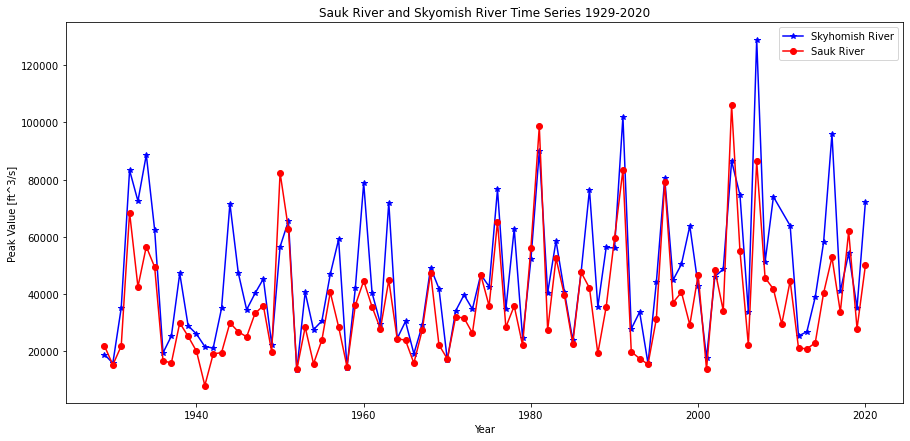

In [6]:
f,ax = plt.subplots(figsize=(15,7))
ax.plot(Skykomish_data['water year'],Skykomish_data['peak value (cfs)'],'b-*',label='Skyhomish River')
ax.plot(Sauk_data['water_year'],Sauk_data['peak_va'],'o-r',label='Sauk River')
ax.set_title('Sauk River and Skyomish River Time Series 1929-2020')
ax.set_xlabel('Year')
ax.set_ylabel('Peak Value [ft^3/s]')
ax.legend()

Though peak flow values tend to be offset from one another (generally, Skyhomish having higher values than Sauk), both rivers tend to vary together in similar ways. For example, in years where the Skyhomish River experiences a high peak value relative to the rest of the time series, the Sauk River tends to also experience a high peak value relative to its other values in the time series. This trend of similar peak value behavior can be described as correlated. 

## B. We know that in water year 1977, there was a large PDO shift in the North Pacific, and we want to know if floods were statistically different before and after this date. In this homework, we will graphically examine the data. For the Sauk River only, create and examine the following plots for three time periods: the entire timeseries, all data before 1977, all data from 1977 and later. (Make sure that the following plots are well-labeled, readable, and convey meaningful information)

First, let's subset the data:

In [7]:
Sauk_data_before_1977 = Sauk_data[Sauk_data['water_year']<1977]
Sauk_data_after_1977 = Sauk_data[Sauk_data['water_year']>=1977]

1. Histograms for the Sauk River for the entire period and the two sub-periods (3 histograms total)

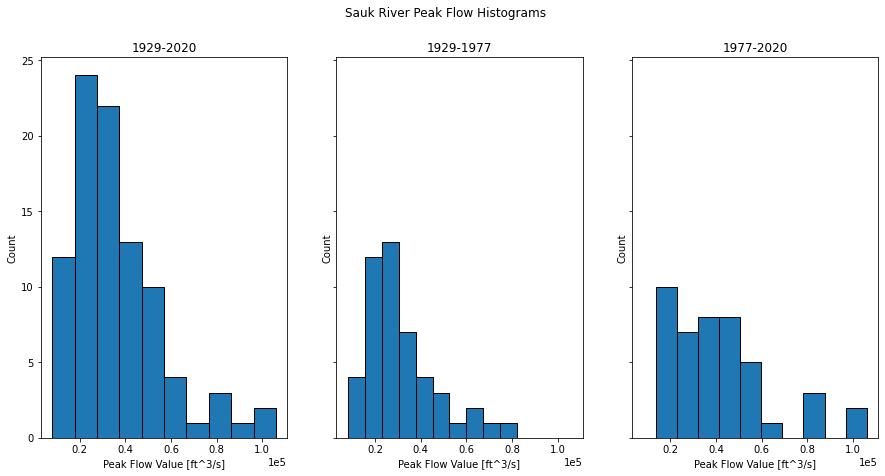

In [8]:
f,ax = plt.subplots(1,3,figsize=(15,7),sharey=True,sharex=True)
ax[0].hist(Sauk_data['peak_va'],bins=10,ec='k')
ax[1].hist(Sauk_data_before_1977['peak_va'],bins=10,ec='k')
ax[2].hist(Sauk_data_after_1977['peak_va'],bins=10,ec='k')
ax[0].set_title('1929-2020')
ax[1].set_title('1929-1977')
ax[2].set_title('1977-2020')
f.suptitle('Sauk River Peak Flow Histograms')
for axs in ax:
    axs.set_xlabel('Peak Flow Value [ft^3/s]')
    axs.set_ylabel('Count')
    axs.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

2. Quantile plots using the Cunnane plotting position (see section 2.1.3 in Helsel et al., 2020) for the Sauk River for the entire period and the two sub-periods. Plot all three lines on the same figure, with different line types/colors and a legend.

In [9]:
def cunnane_quantile(df, column_name):
    '''This function will compute the Cunnane plotting position for the values in a column of a dataframe.
    It requres a pandas dataframe, and the column name of interest (a text string) as inputs.
    The output is a new dataframe, ranked (sorted) with an extra column with the plotting position.'''
    
    # Rank all our values
    ranked_df = df.sort_values(by=[column_name]).reset_index()
    
    # Calculate the Cunnane plotting position
    ranked_df['cunnane_plotting_position'] = ((ranked_df.index + 1) - (2/5)) / (ranked_df[column_name].count() + (1/5))
        
    return ranked_df

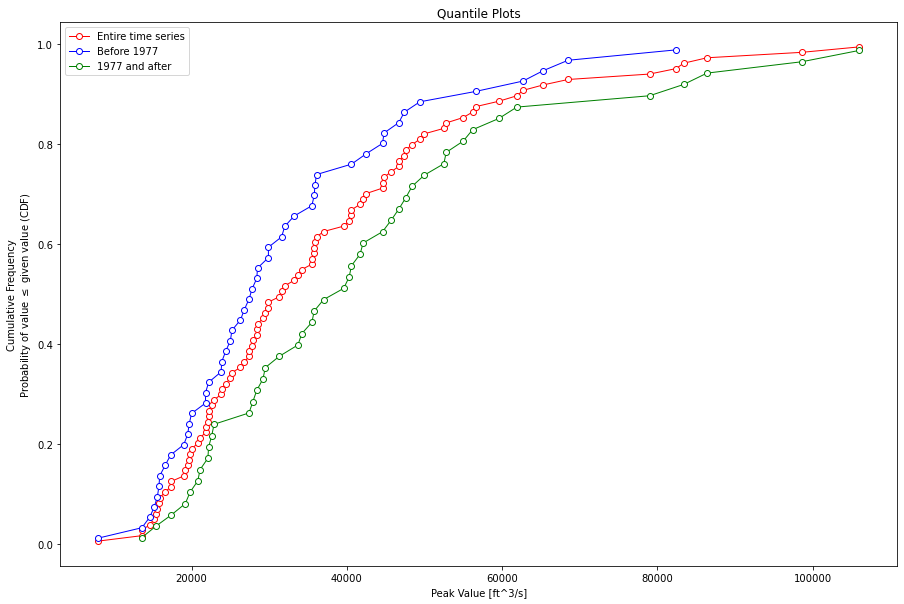

In [17]:
f,ax = plt.subplots(figsize=(15,10))
cunnane_quantile(Sauk_data,'peak_va').plot(ax=ax,x='peak_va',y='cunnane_plotting_position',linestyle='-', lw=1, 
               marker='o', markerfacecolor='white', markeredgecolor='r', 
               color='r',label='Entire time series')
cunnane_quantile(Sauk_data_before_1977,'peak_va').plot(ax=ax,x='peak_va',y='cunnane_plotting_position',linestyle='-', lw=1, 
               marker='o', markerfacecolor='white', markeredgecolor='b', 
               color='b',label='Before 1977')
cunnane_quantile(Sauk_data_after_1977,'peak_va').plot(ax=ax,x='peak_va',y='cunnane_plotting_position',linestyle='-', lw=1, 
               marker='o', markerfacecolor='white', markeredgecolor='g', 
               color='g',label='1977 and after')
ax.set_title('Quantile Plots')
ax.set_xlabel('Peak Value [ft^3/s]')
ax.set_ylabel('Cumulative Frequency\nProbability of value $\leq$ given value (CDF)')
ax.legend()

3. Probability Density Functions (PDFs) for the Sauk River for the entire period and the two sub-periods. The 3 plots should be plotted on one graph, with different line types and a legend.

4. Estimate the sample mean and standard deviation for each of the two sub-periods (before and after 1977). Assuming a Gaussian (normal) distribution, add theoretical quantile curves to the quantile plots you made earlier. (Theoretical meaning that you're plotting Gaussian Cumulative Density Functions (CDFs) that have the same mean and standard deviation that you calculate). (The plot should now have 6 lines on it – please choose colors and line types to help distinguis them, and label carefully.)

5. Box and whisker plots for each of for the entire period and the two sub-periods, with appropriate labels.

## C. Based on all the plots you have now created, write few sentences in a markdown cell discussing whether or not you think a change has occurred in the peak flows around 1977. Be sure to reference your plots (Fig. 1, Fig. 2, etc.) when you discuss them.

For information on each module and function, including what they return or their arguments, look at the documentation at https://docs.python.org/3/. Use the search bar to find information about any module or function.

Also, notice the comments in the code above. The comments begin with a # symbol which means that the line will not be recognized and run as code by the computer. Rather, they serve as communication about the piece of code to another person reading it. When commenting code, too much is better than not enough. Comments will help you debug code and troubleshoot issues more quickly and effectively.